## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv("011 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Create X (feature matrix)

x=heart_disease.drop("target",axis=1)

# Create y (labels)
y=heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# keep the default parameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Fit the model to the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [7]:
clf.fit(x_train,y_train);

In [8]:
# make a prediction
import numpy as np
y_preds=clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
#4. Evaluate the model on train and test data
clf.score(x_train,y_train)

1.0

In [10]:
clf.score(x_test,y_test)

0.7540983606557377

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.71      0.79      0.75        28

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[24,  9],
       [ 6, 22]], dtype=int64)

In [13]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [14]:
# 5. Imrpove a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 73.77%

Trying model with 20 estimators...
Model accuracy on test set: 73.77%

Trying model with 30 estimators...
Model accuracy on test set: 77.05%

Trying model with 40 estimators...
Model accuracy on test set: 70.49%

Trying model with 50 estimators...
Model accuracy on test set: 75.41%

Trying model with 60 estimators...
Model accuracy on test set: 78.69%

Trying model with 70 estimators...
Model accuracy on test set: 77.05%

Trying model with 80 estimators...
Model accuracy on test set: 73.77%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [15]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [16]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.819672131147541

## 1. Geeting ur data ready for ML
1. Split data into features and labels (x and y)
2. Filling (also called imputting) or disregarding missing values
3. converting non-numerical values to numerical values (also called feature engineering)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [21]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into train and test
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [26]:
# Build ML model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [27]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test =train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)


NameError: name 'transformed_x' is not defined

In [28]:
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [29]:
x_test

,Make,Colour,Odometer (KM),Doors
908,Nissan,White,237645,3
411,BMW,Blue,72575,5
802,Honda,White,192655,4
550,Toyota,Red,86284,4
668,Nissan,Red,200403,4
...,...,...,...,...
897,Toyota,White,28809,4
510,Toyota,Green,118706,4
251,Toyota,Black,217253,4
358,BMW,Blue,103283,3


### 1.2 Handling missing values 

In [30]:
car_sales_missing_data=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Create x and y
x=car_sales_missing_data.drop("Price",axis=1)
y=car_sales_missing_data["Price"]

In [33]:
# Let's try and convert  our data to numbers --> cannot contains NaN input


## Option 1 : Fill missiong data with Pandas

In [34]:
# Fill the "Make","Colour","Odo","Doors" column
car_sales_missing_data["Make"].fillna("missing",inplace=True)
car_sales_missing_data["Colour"].fillna("missing",inplace=True)
car_sales_missing_data["Odometer (KM)"].fillna(car_sales_missing_data["Odometer (KM)"].mean(),inplace=True)
car_sales_missing_data["Doors"].fillna(4,inplace=True)

In [35]:
car_sales_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove rows with missing Price values
car_sales_missing_data.dropna(inplace=True)

In [37]:
len(car_sales_missing_data)

950

In [38]:
x=car_sales_missing_data.drop("Price",axis=1)
y=car_sales_missing_data["Price"]

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_missing_data)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2 : Fill missing values with Scikit-Learn

In [40]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
# Split into x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing_data["Price"]

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values-> missing & numerical values->mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns

cat_feature=["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

# Create an imputer (something that fills missing data)

imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_feature),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [45]:
car_sales_filled=pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [46]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                             remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [48]:
np.random.seed(42)
x_train, x_test, y_train, y_test =train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Chossing the right estimator/ algortihm for your problem

* Sklearn-> ML models/ algo are called estimators
* Classification problem- predicting a category ( heart disease or not)
    * clf-> classifier-> classification estimator
* Regression problem-> predicting a number (selling price of a car)

### 2.1 Picking a ML model for a regression problem

Lets use california housing dataset -> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [49]:
# Get california housing dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
h_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])
h_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
h_df["target"]=housing["target"]
h_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
h_df=h_df.drop("MedHouseVal",axis=1)
h_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import Algorithm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
#Setup random seed

np.random.seed(42)

#Create the data

X=h_df.drop("target",axis=1)
Y=h_df["target"]

# Split dataset
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2)

#Instantiate and fit the model (on the training set)
model=Ridge()
model1=Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

In [ ]:
# Trying Ensemble Model -> combination of smaller models to try and make better pred in a single model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=h_df.drop("target",axis=1)
Y=h_df["target"]
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2)

modl=RandomForestRegressor()
modl.fit(x_train,y_train)
modl.score(x_test,y_test)

## 2.2 Picking a ML model for a classification problem

In [53]:
h_d=pd.read_csv("011 heart-disease.csv")
h_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
# Try LinearSVC estimator class

from sklearn.svm import LinearSVC

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cf=LinearSVC(max_iter=1000)
cf.fit(x_t,y_t)
cf.score(x_ts,y_ts)


0.8688524590163934

In [55]:
# Try RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cfr.fit(x_t,y_t)
cfr.score(x_ts,y_ts)


0.8524590163934426

# Tidbit:
   # 1. Structured Data-> Ensemble Methods
   # 2. Unstructured Data -> Deep Learning/ Transfer Learning

## 3. Fit the model/ algo on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for: 
* `x`= features, feature variables, data
* `y`=labels, targets, target variables

In [61]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()
# Fit the model --> 3.1
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [62]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [63]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using ML model

2 ways to make predictions:
    1.`predict()`
    2.`predict_proba()`

In [64]:
# Use a trained model to make predictions

clf.predict(np.array([1,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [66]:
y_pred=clf.predict(x_test)

In [67]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
# Compare pred to truth labels to evaluate the model

np.mean(y_pred==y_test)

0.8524590163934426

In [69]:
clf.score(x_test,y_test)

0.8524590163934426

In [70]:
accuracy_score(y_pred,y_test)

0.8524590163934426

# Make pred with `predict_proba()`

In [71]:
# predict_proba() returns probabilities of a classification model

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [72]:
# Lets's predict on the same data

clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

### `predict()` can also be used for regression models

In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=h_df.drop("target",axis=1)
y=h_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [74]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [75]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## Evaluating a ML model

Three ways to evaluate a Sklearn models/ estimators:
 1. Estimator's built in `score()` method
 2. The `scoring` parameter
 3. Problem-specific metric functions   

### 4.1 Evaluating a model with the `score` method

In [76]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cfr.fit(x_t,y_t)



RandomForestClassifier()

In [77]:
cfr.score(x_t,y_t)

1.0

In [78]:
cfr.score(x_ts,y_ts)

0.8524590163934426

### Let's use the `score` method for regression problem

In [79]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=h_df.drop("target",axis=1)
y=h_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
model.score(x_test,y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cfr.fit(x_t,y_t)

RandomForestClassifier()

In [82]:
cfr.score(x_ts,y_ts)

0.8524590163934426

In [83]:
cross_val_score(cfr,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [84]:
cross_val_score(cfr,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [85]:
np.random.seed(42)
cfr_single_score=cfr.score(x_ts,y_ts)
cfr_cross_val_score=np.mean(cross_val_score(cfr,x,y)) # preferred

#Comparison
cfr_single_score, cfr_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

In [86]:
### Accuracy

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cfr.fit(x_t,y_t)
cvs=cross_val_score(cfr,x,y)

In [87]:
np.mean(cvs)

0.811639344262295

In [88]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cvs) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.16%


**Area under the receiving operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC curve

ROC curves are comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)


In [89]:
x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cfr.fit(x_t,y_t)

RandomForestClassifier()

In [90]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities

y_probs=cfr.predict_proba(x_ts)
y_probs[:10]  # 1st value ->prob of 0 and 2nd val->prob of 1

array([[0.92, 0.08],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.14, 0.86],
       [0.05, 0.95],
       [0.29, 0.71],
       [0.82, 0.18],
       [0.44, 0.56],
       [0.04, 0.96]])

In [91]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96])

In [92]:
# Calculate fpr, tpr and threshold

fpr,tpr,thresholds=roc_curve(y_ts,y_probs_positive)
fpr,tpr,thresholds

(array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
        0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
        0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
        0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
        0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
        0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
        1.        ]),
 array([0.        , 0.08571429, 0.2       , 0.31428571, 0.37142857,
        0.4       , 0.45714286, 0.51428571, 0.51428571, 0.54285714,
        0.65714286, 0.65714286, 0.74285714, 0.74285714, 0.77142857,
        0.77142857, 0.82857143, 0.82857143, 0.88571429, 0.91428571,
        0.91428571, 0.94285714, 0.94285714, 0.97142857, 0.97142857,
        0.97142857, 0.97142857, 0.97142857, 1.        , 1.        ,
        1.        ]),
 array([ inf, 0.99, 0.96, 0.91, 0.9 , 0.89, 0.86, 0.85, 0.83, 0.78, 0.71,
        0.68, 0.64, 0.6 , 0.58, 0.56, 0.53, 0.47, 0.46, 0.44, 0.4 

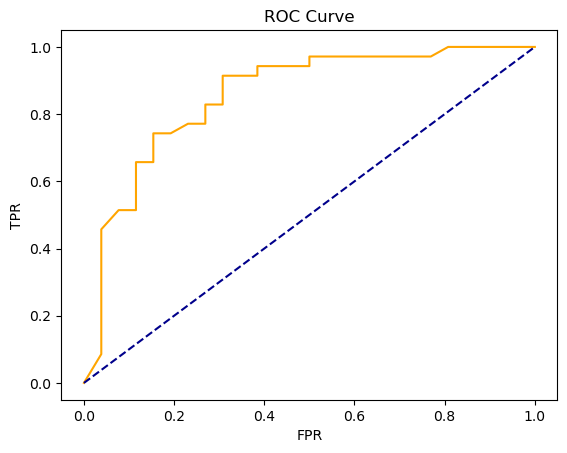

In [93]:
# Creare a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
   """
   Plots a ROC curve given the fpr and tpr of a model.
   
   """
#Plot roc curve
plt.plot(fpr,tpr,color="orange",label="ROC")
#Plot line with no predictive power (baseline)
plt.plot([0,1],[0,1], color="darkblue",linestyle="--", label="Guessing")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_ts,y_probs_positive)

0.8554945054945055

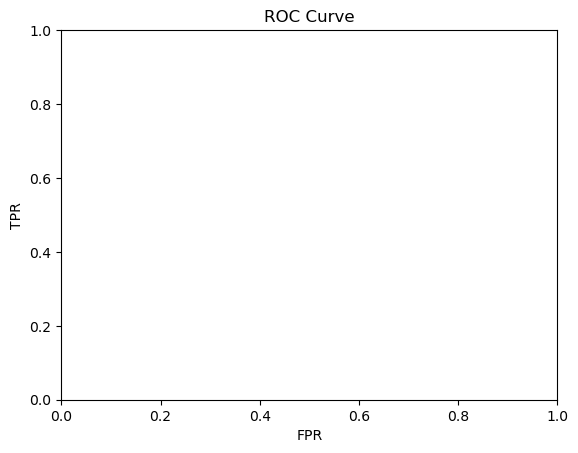

In [95]:
#Plot perfect ROC curve & AUC score

fpr,tpr,thresholds=roc_curve(y_ts,y_ts)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plot_roc_curve(fpr,tpr)
plt.show()

In [96]:
roc_auc_score(y_ts,y_ts)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 
In essence, giving you an idea of where the model is getting confused.

In [97]:
from sklearn.metrics import confusion_matrix

y_preds=cfr.predict(x_ts)
confusion_matrix(y_ts,y_preds)

array([[19,  7],
       [ 6, 29]], dtype=int64)

In [98]:
# Visualiz confusion matrix with pd.crosstab()
pd.crosstab(y_ts,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,19,7
1,6,29


In [99]:
22+6+5+28

61

In [100]:
22+28

50

In [101]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Windows\Desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  openssl                                 1.1.1v-h2bbff1b_0 --> 1.1.1w-h2bbff1b_0 




openssl-1.1.1w       | 5.5 MB    |            |   0% 
openssl-1.1.1w       | 5.5 MB    |            |   0% 
openssl-1.1.1w       | 5.5 MB    | 4          |   4% 
openssl-1.1.1w       | 5.5 MB    | 6          |   7% 
openssl-1.1.1w       | 5.5 MB    | #3         |  13% 
openssl-1.1.1w       | 5.5 MB    | #7         |  1



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4




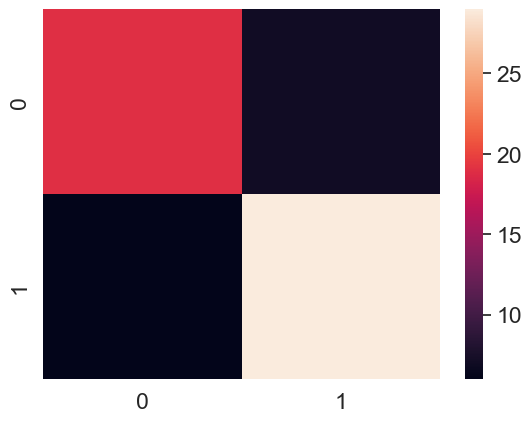

In [102]:
# Make our confusion matrix more visually appealing with seaborn heatmap

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_ts,y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat);

In [103]:
### Creating a confusion matrix using Scikit-Learn

import sklearn
sklearn.__version__

'1.3.0'

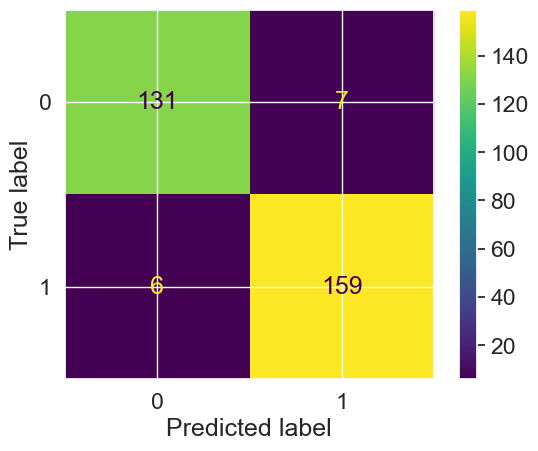

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=cfr, X=x, y=y)


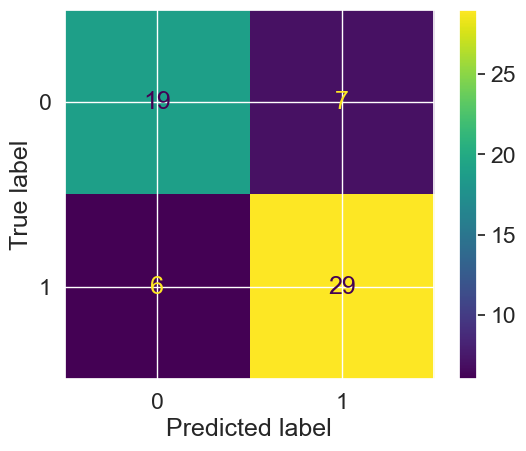

In [105]:
ConfusionMatrixDisplay.from_predictions(y_true=y_ts,y_pred=y_preds)

**Classification Report**

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [107]:
# Where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1
disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are:
1. R^2 or co-efficient of determination
2. Mean absolute error (MAE)
3. Mean Squared Error (MSE)

In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=h_df.drop("target",axis=1)
y=h_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [109]:
model.score(x_test,y_test)

0.8065734772187598

In [110]:
h_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
y_test.mean()

2.0550030959302323

In [112]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean=np.full(len(y_test),y_test.mean())

In [113]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [114]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

**MAE**
    Avg of the abs differences b2in predictions and actual values.
    It gives u an idea of how wrong ur model pred are

In [115]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [116]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values":y_preds})

df["differences"]=df["predicted values"]-df["actual values"]
df["diff_abs"]=abs(df["differences"])
df.head(10)

,actual values,predicted values,differences,diff_abs
20046,0.47700,0.493840,0.016840,0.016840
3024,0.45800,0.754940,0.296940,0.296940
15663,5.00001,4.928596,-0.071414,0.071414
20484,2.18600,2.543160,0.357160,0.357160
9814,2.78000,2.331760,-0.448240,0.448240
13311,1.58700,1.652530,0.065530,0.065530
7113,1.98200,2.343230,0.361230,0.361230
7668,1.57500,1.661820,0.086820,0.086820
18246,3.40000,2.474890,-0.925110,0.925110
5723,4.46600,4.834478,0.368478,0.368478


In [117]:
df["diff_abs"].mean()

0.32659871732073664

In [118]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [119]:
 y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [120]:
#Mean squared error

from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [121]:
df["square_diff"]=np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,diff_abs,square_diff
20046,0.47700,0.493840,0.016840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.368478,0.135776


In [122]:
# Calculate MSE by hand
squared=np.square(df["differences"])
squared.mean()

0.2534678520824551

### 4.2.3 Finally using the scoring parameters

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

cfr=RandomForestClassifier()
cv_acc=cross_val_score(cfr,x,y,cv=5,scoring=None)
cv_acc

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [124]:
print(f"The cross-validated  accuracy is: {np.mean(cv_acc)*100:.2f}%")
#cfr.fit(x_t,y_t)
#cvs=cross_val_score(cfr,x,y)

The cross-validated  accuracy is: 82.15%


In [125]:
cv_acc=cross_val_score(cfr,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.81967213, 0.8       , 0.78333333])

In [126]:
print(f"The cross-validated  accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated  accuracy is: 81.83%


In [127]:
# Precision

cv_precision=cross_val_score(cfr,x,y,cv=5,scoring="precision")
cv_precision

array([0.8       , 0.90322581, 0.85714286, 0.87878788, 0.75      ])

In [128]:
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.78%


In [129]:
# Recall
cv_recall=cross_val_score(cfr,x,y,cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.90909091, 0.81818182, 0.90909091, 0.84848485])

In [130]:
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 87.27%


Let's see the `scoring` parameter is used for regression problem...

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=h_df.drop("target",axis=1)
y=h_df["target"]

x_t, x_ts, y_t, y_ts =train_test_split(x,y,test_size=0.2)

clf=RandomForestRegressor()
cv_r2=cross_val_score(clf,x,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6502572250766258

In [132]:
cv_mae=cross_val_score(clf,x,y,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.466238291516473

In [133]:
cv_mse=cross_val_score(clf,x,y,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43610556849553384

## 4.3 Using differe evaluation metrics as sklearn functions

The 3rd way is to evaluate sklearn ml models/estimators is to using `sklearn.metric`

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=h_d.drop("target",axis=1)
y=h_d["target"]

x_t,x_ts,y_t,y_ts=train_test_split(x,y,test_size=0.2)

mdl=RandomForestClassifier()
mdl.fit(x_t,y_t)
y_pr=mdl.predict(x_ts)
mdl.score(x_ts,y_ts)

print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_ts,y_pr)*100:.2f}%")
print(f"Precision Score: {precision_score(y_ts,y_pr)}")
print(f"Recall Score: {recall_score(y_ts,y_pr)}")
print(f"F1 Score: {f1_score(y_ts,y_pr)}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision Score: 0.8484848484848485
Recall Score: 0.875
F1 Score: 0.8615384615384615


In [74]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=h_df.drop("target",axis=1)
y=h_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_preds=model.predict(x_test)

print("Regression metrics on the test set:")
print(f"R^2 Score: {r2_score(y_test,y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set:
R^2 Score: 0.8065734772187598
Mean Absolute Error: 0.32659871732073664
Mean Squared Error: 0.2534678520824551


## 5. Imroving a model

First predicitions = baseline predictions
First model= baseline model

1. From a data perspectives:
    * Could we collect more data? (generally the more data, the better)
    * Could we improve our data? 

2. From a model perspective:
    * Is there a better model we could use?
    * Could we improve the current model?


3. Hyperparameters vs. Parameters:
    * Parameters=model fin these patterns in data
    * Hyperparameters=settings on a model you can adjusto (potentially) improve its ability to find patterns
    
Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [75]:
cfr=RandomForestClassifier()
cfr.get_params()  # Hyperparameters!

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by Hand

Let's make 3 sets-> training, validation and test

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [77]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison in y_true labels vs y_pred labels
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2),}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score:{f1:.2f}")
    
    return metric_dict

In [78]:
np.random.seed(42)

#Shuffle the data
heart_disease=h_d.sample(frac=1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

train_split=round(0.7*len(heart_disease)) #70% of the data
valid_split=round(train_split + 0.15*len(heart_disease)) #15% of the data
x_train,y_train=x[:train_split], y[:train_split]
x_valid,y_valid=x[train_split:valid_split], y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

cfr=RandomForestClassifier(n_estimators=10)
cfr.fit(x_train,y_train)

#Make baseline predicitions
y_preds=cfr.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy:80.00%
Precision:0.77
Recall:0.92
F1 Score:0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [79]:
np.random.seed(42)

#Shuffle the data
heart_disease=h_d.sample(frac=1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

train_split=round(0.7*len(heart_disease)) #70% of the data
valid_split=round(train_split + 0.15*len(heart_disease)) #15% of the data
x_train,y_train=x[:train_split], y[:train_split]
x_valid,y_valid=x[train_split:valid_split], y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

cfr=RandomForestClassifier(n_estimators=100)
cfr.fit(x_train,y_train)

#Make baseline predicitions
y_preds=cfr.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy:82.22%
Precision:0.81
Recall:0.88
F1 Score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [80]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

x_t,x_ts,y_t,y_ts=train_test_split(x,y,test_size=0.2)

cfr3=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV

rs_cfr=RandomizedSearchCV(estimator=cfr3,
                         param_distributions=grid,
                         n_iter=10, # No of models to try
                         cv=5,
                         verbose=2)

# Fit the RandomizedSearchCV version of cfr

rs_cfr.fit(x_t,y_t)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [81]:
rs_cfr.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [82]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_cfr.predict(x_ts)

rs_metrics=evaluate_preds(y_ts,rs_y_preds)

Accuracy:81.97%
Precision:0.77
Recall:0.86
F1 Score:0.81


## 5.3 Hyperparameters tuning with GridSearchCV

In [83]:
 grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [84]:
grid_2={ 'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split':[6],
         'min_samples_leaf': [1, 2]}

In [85]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]


x_t,x_ts,y_t,y_ts=train_test_split(x,y,test_size=0.2)

cfr3=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV

gs_cfr=GridSearchCV(estimator=cfr3,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)

# Fit the GridSearchCV version of cfr

gs_cfr.fit(x_t,y_t)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [87]:
gs_cfr.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [88]:
gs_y_preds=gs_cfr.predict(x_ts)

gs_metrics=evaluate_preds(y_ts,gs_y_preds)

Accuracy:81.97%
Precision:0.77
Recall:0.86
F1 Score:0.81


<Axes: >

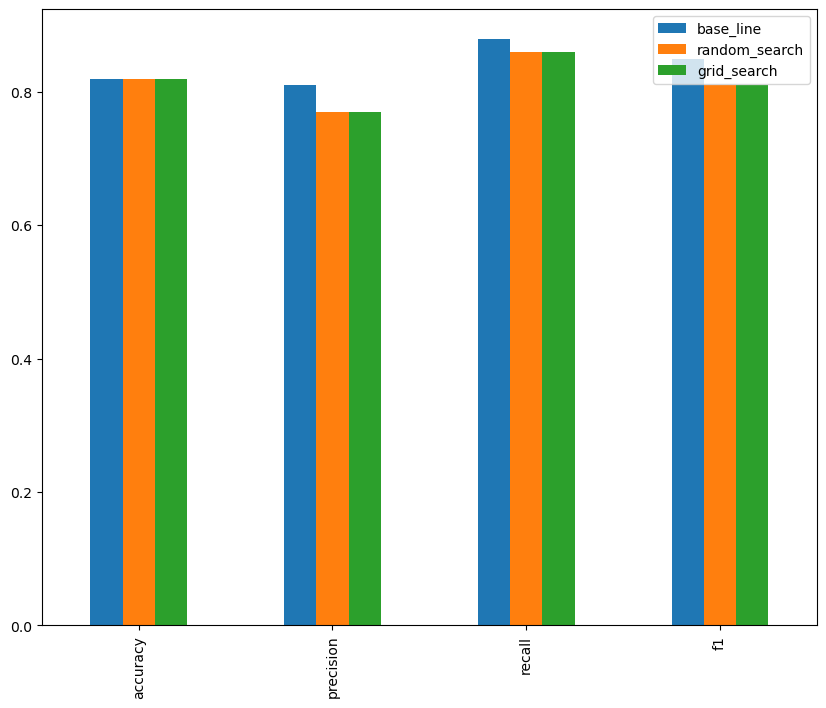

In [92]:
compare_metrics=pd.DataFrame({"base_line":baseline_metrics,
                           # "cfr_2":cfr3_metrics,
                            "random_search":rs_metrics,
                            "grid_search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading trained ML models

Two ways:
    1. With Python's `pickle` module
    2. With the `joblib` module

In [93]:
import pickle

#Save an existing model to file

pickle.dump(gs_cfr,open("gs_random_forst_model_1.pkl","wb"))

In [94]:
#Load a saved model

loaded_pickle_model=pickle.load(open("gs_random_forst_model_1.pkl","rb"))

In [95]:
#Make some predicitions

pickle_y_preds=loaded_pickle_model.predict(x_ts)
evaluate_preds(y_ts,pickle_y_preds)

Accuracy:81.97%
Precision:0.77
Recall:0.86
F1 Score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [96]:
from joblib import dump, load

#Save model to file
dump(gs_cfr, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [97]:
loaded_job_model=load(filename="gs_random_forest_model_1.joblib")

In [98]:
joblib_y_preds=loaded_job_model.predict(x_ts)
evaluate_preds(y_ts,joblib_y_preds)

Accuracy:81.97%
Precision:0.77
Recall:0.86
F1 Score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### 7. Putting it all together

In [112]:
data=pd.read_csv("./car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [100]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [101]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Steps we want to do (all in 1 cell):
    1. Fill missing data
    2. Convert data to numbers
    3. Build a model on the data

In [115]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing values
data=pd.read_csv("./car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline

categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_tranformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer(
transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_tranformer,numeric_features)
])

#Creating a preprocessing and modelling pipeline

model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])

#Split Data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.22188417408787875

### It's also possible to use `GridSearchCV` or `RandomizedSearchCv` with our `Pipeline`

In [116]:
# Use GridSearchCV with our regression Pipeline 

pipe_grid={
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto","sqrt"],
    "model__min_samples_split": [2,4]
}

gs_model=GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [117]:
gs_model.score(x_test,y_test)

0.2848784564026805